## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

###  Load Dataset

In [2]:
df = pd.read_csv("database SFRC.csv")

### Data Preprocessing

In [3]:
df.head(10)

,d(mm),B(mm),fc(Mpa),Rr,av/d,F,fy(Mpa),vf%,Vu (KN)
0,251.0,150.0,28.1,0.0267,3.0876,0.4875,565.0,0.75,112.9500
1,251.0,150.0,25.3,0.0267,3.0876,0.4875,565.0,0.75,79.0650
2,251.0,150.0,27.9,0.0267,3.0876,0.6500,565.0,1.00,109.1850
3,251.0,150.0,26.2,0.0267,3.0876,0.6500,565.0,1.00,123.4920
4,251.0,150.0,28.1,0.0267,3.0876,0.9750,565.0,1.50,111.0675
5,251.0,150.0,27.3,0.0267,3.0876,0.9750,565.0,1.50,131.0220
6,251.0,150.0,27.5,0.0267,3.0876,0.4000,565.0,0.50,64.7580
7,251.0,150.0,24.9,0.0267,3.0876,0.4000,565.0,0.50,77.1825
8,251.0,150.0,27.8,0.0267,3.0876,0.6000,565.0,0.75,91.1130
9,251.0,150.0,27.3,0.0267,3.0876,0.6000,565.0,0.75,101.6550


In [4]:
df.isnull().sum()

d(mm)      0
B(mm)      0
fc(Mpa)    0
Rr         0
av/d       0
F          0
fy(Mpa)    0
vf%        0
Vu (KN)    0
dtype: int64

In [5]:
# dependent and independent variables
X = df.drop('Vu (KN)', axis = 1)
y = df['Vu (KN)']

In [7]:
# normilization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm = scaler.fit_transform (X)
X_norm

array([[-0.08232928,  0.03050947, -0.83064519, ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.9419731 , ..., -0.14488495,
         0.97627937, -0.25343822],
       [-0.08232928,  0.03050947, -0.83859718, ...,  0.30745235,
         0.97627937,  0.20182885],
       ...,
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.29312579,
        -0.51769709, -1.25502576],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -1.08435473,
        -0.51769709, -0.89081211],
       [ 0.01120566, -0.43239725, -0.67955731, ..., -0.87558367,
        -0.51769709, -0.52659846]])

In [8]:
# train_test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

### Define SVR Model and Train

In [9]:
from sklearn.svm import SVR
svr1 = SVR(kernel='linear')
svr1.fit(X_train, y_train)

SVR(kernel='linear')

### Evaluating the model

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,svr1.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,svr1.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,svr1.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,svr1.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,svr1.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,svr1.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,svr1.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,svr1.predict(X_train)))

The RMSE  on the testing dataset is:  51.72405541022963
The RMSE  on the training dataset is:  76.74895631766141
The MSE  on the testing dataset is:  2675.377908080505
The MSE  on the training dataset is:  5890.402295850298
The MAE  on the testing dataset is:  34.5657603149157
The MAE  on the training daset is:  42.77949006588567
The r2_score on the testing dataset is:  0.8201067917766357
The r2_score on the training dataset is:  0.7577691546233747


### Hyperparameter Optimization using Grid Search

In [12]:
# Define hyperparameter grid
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2, 0.5],  # Margin of tolerance
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient
}

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100, 'epsilon': 0.2, 'gamma': 'scale'}


### Train Optimized SVR Model

In [13]:
# Train SVR model with optimized hyperparameters
optimized_svr = SVR(kernel='linear', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
optimized_svr.fit(X_train, y_train)


SVR(C=100, epsilon=0.2, kernel='linear')

In [14]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_svr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_svr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_svr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_svr.predict(X_train)))

The RMSE  on the testing dataset is:  52.31329896705125
The RMSE  on the training dataset is:  75.15320052478515
The MSE  on the testing dataset is:  2736.6812488160854
The MSE  on the training dataset is:  5648.003549118567
The MAE  on the testing dataset is:  34.70016471952132
The MAE  on the training daset is:  42.30218195553365
The r2_score on the testing dataset is:  0.8159847368675235
The r2_score on the training dataset is:  0.7677373113620795


### Actual vs Predicted Capacity

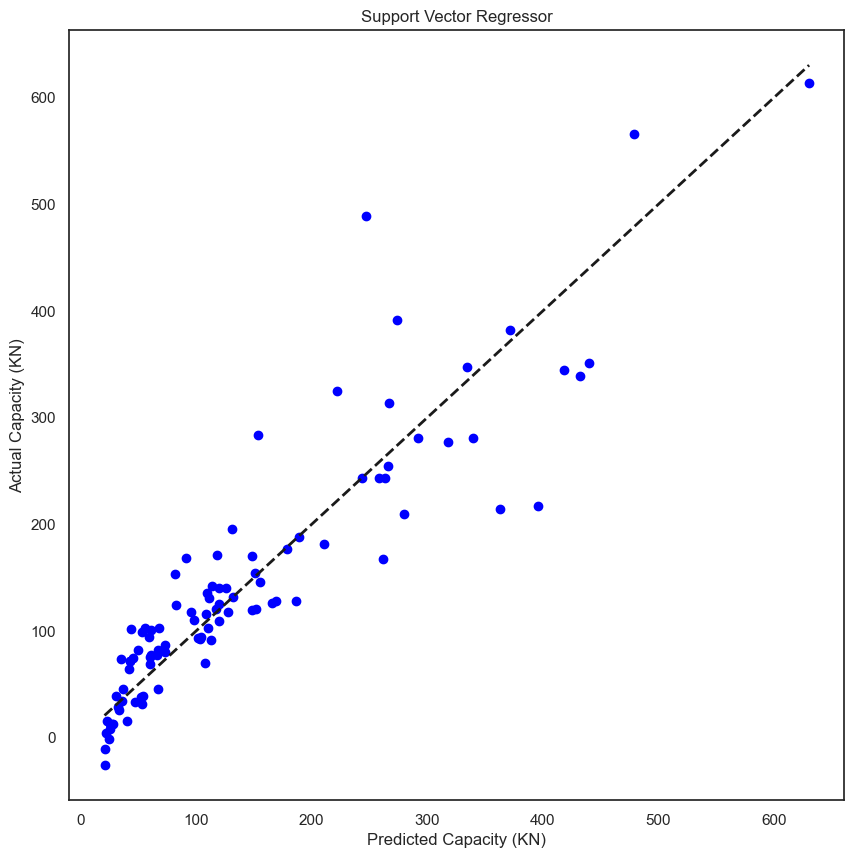

In [17]:
plt.figure(figsize=(10, 10))
sns.set_style("white")
sns.set_style('white')
plt.xlabel("Predicted Capacity (KN)")
plt.ylabel("Actual Capacity (KN)")
plt.title("Support Vector Regressor")
plt.scatter(y_test, optimized_svr.predict(X_test), color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Ideal Fit")
plt.show()

In [46]:
param_grid = {
    'C': [0.1, 1, 10, 50, 100, 500,1000],  # Wider range of regularization parameter
    'epsilon': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 1],  # Finer granularity
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]  # More flexibility for kernel function
}

grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train optimized SVR model
optimized_svr = SVR(kernel='rbf', C=best_params['C'], epsilon=best_params['epsilon'], gamma=best_params['gamma'])
optimized_svr.fit(X_train, y_train)


Best Parameters: {'C': 1000, 'epsilon': 0.5, 'gamma': 'scale'}


SVR(C=1000, epsilon=0.5)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MSE  on the testing dataset is: ',(mean_squared_error(y_test,optimized_svr.predict(X_test))))
print('The MSE  on the training dataset is: ',(mean_squared_error(y_train,optimized_svr.predict(X_train))))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,optimized_svr.predict(X_test)))
print('The MAE  on the training daset is: ',mean_absolute_error(y_train,optimized_svr.predict(X_train)))
print('The r2_score on the testing dataset is: ',r2_score(y_test,optimized_svr.predict(X_test)))
print('The r2_score on the training dataset is: ',r2_score(y_train,optimized_svr.predict(X_train)))

The RMSE  on the testing dataset is:  66.68458818661115
The RMSE  on the training dataset is:  62.009446014425464
The MSE  on the testing dataset is:  4446.83430161792
The MSE  on the training dataset is:  3845.171395015946
The MAE  on the testing dataset is:  38.82202342357146
The MAE  on the training daset is:  38.30778917678249
The r2_score on the testing dataset is:  0.7009935357021422
The r2_score on the training dataset is:  0.8418751265445993
